# ➪ Práctica 2

# CLUSTERING (AGRUPACIÓN) DE SEMILLAS

## 1. Comparación visual de escalados con PCA


Para comprobar qué técnica de escalado es más adecuada para nuestro conjunto de datos, aplicamos los siguientes pasos:

- Se probaron tres técnicas de escalado: **MinMaxScaler**, **StandardScaler** y **RobustScaler**.
- Después del escalado, se aplicó un **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad a 2 componentes, lo que nos permite visualizar los datos en 2D.
- Finalmente, se colorearon los puntos según la clase de semilla (`Kama`, `Rosa` y `Canadian`) para facilitar la interpretación visual.

La semilla utilizada para asegurar la reproducibilidad es **100474933**.

A continuación, se muestran las representaciones visuales para cada escalado:



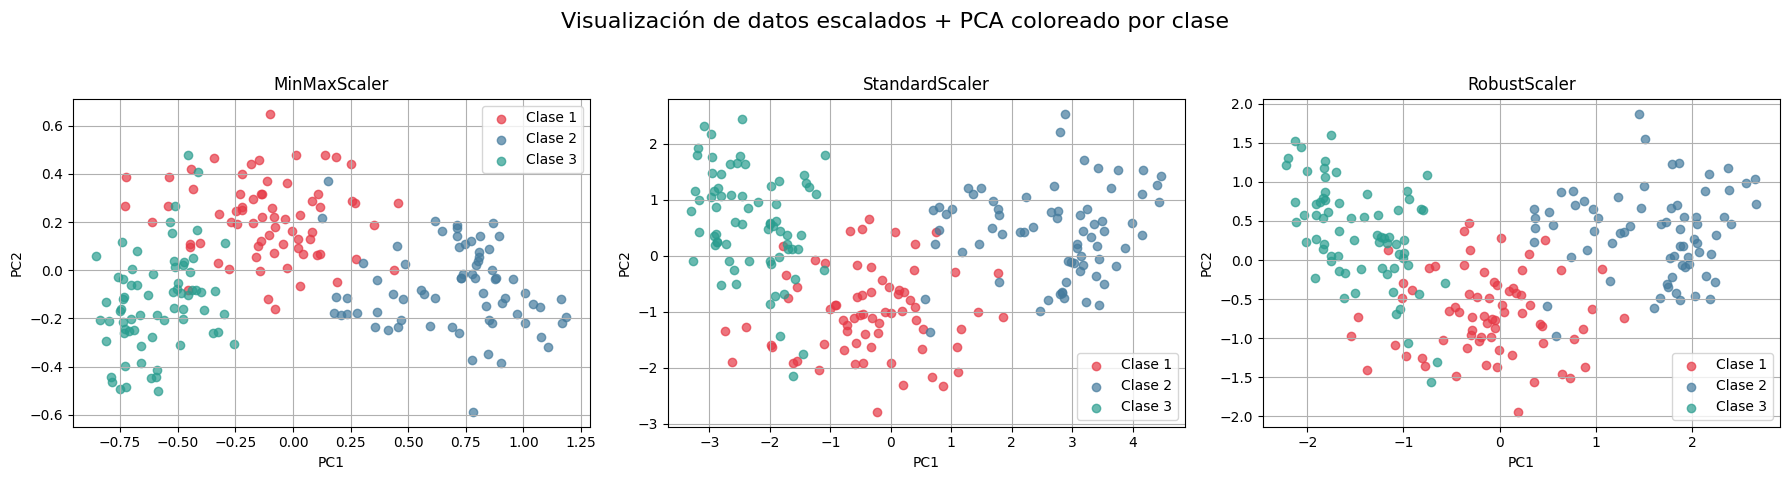

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Semilla
random_state = 100474933
np.random.seed(random_state)

# Cargar los datos
ruta = "data/semillas.csv"
datos = pd.read_csv(ruta)

# Separar características y clase
X = datos.drop(columns="clase")
y = datos["clase"]

# Diccionario de scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Colores para las clases
colores = {1: "#E63946", 2: "#457B9D", 3: "#2A9D8F" }
nombres_clases = {1: "Kama", 2: "Rosa", 3: "Canadian"}  

# Crear una figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Aplicar cada scaler + PCA y graficar
for ax, (nombre, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ("scaler", scaler),
        ("pca", PCA(n_components=2, random_state=random_state))
    ])
    X_pca = pipeline.fit_transform(X)

    for clase in sorted(y.unique()):
        ax.scatter(
            X_pca[y == clase, 0],
            X_pca[y == clase, 1],
            label=f"Clase {clase}",
            alpha=0.7,
            color=colores[clase]
        )
    
    ax.set_title(nombre)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(True)
    ax.legend()

plt.suptitle("Visualización de datos escalados + PCA coloreado por clase", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Conclusión visual del escalado con PCA

A partir de las visualizaciones obtenidas, se pueden extraer las siguientes observaciones:

- **MinMaxScaler**: Es la técnica que ofrece una representación más clara y separada de las clases en el espacio PCA. La estructura de los datos proyectados en 2D permite distinguir con nitidez las tres agrupaciones, lo que indica que este escalado ha capturado bien las relaciones relativas entre muestras. Además, es el que logra mayor varianza explicada (91.81%).

- **StandardScaler**: Aunque también muestra una buena separación entre clases, las proyecciones son ligeramente más solapadas. La varianza explicada es algo menor (88.98%), y la visualización sugiere algo más de dispersión dentro de los grupos.

- **RobustScaler**: A pesar de ser útil frente a valores atípicos, en este caso no ofrece una ventaja visual clara. Las clases están más mezcladas, y la varianza explicada es la más baja (86.91%).

**Conclusión**: La técnica de escalado que ofrece una representación más clara y compacta de los datos en el espacio PCA es **MinMaxScaler**, por lo que se recomienda continuar la práctica utilizando este método.



In [28]:
for name, scaler in scalers.items():
    pipe = Pipeline([
        ("scaler", scaler),
        ("pca", PCA(n_components=2, random_state=random_state))
    ])
    X_pca = pipe.fit_transform(X)
    pca = pipe.named_steps["pca"]
    varianza = pca.explained_variance_ratio_
    print(f"{name}: {varianza}, Varianza total explicada: {varianza.sum():.4f}")

MinMaxScaler: [0.78903362 0.1290949 ], Varianza total explicada: 0.9181
StandardScaler: [0.71874303 0.17108184], Varianza total explicada: 0.8898
RobustScaler: [0.66945748 0.19962637], Varianza total explicada: 0.8691


### Varianza explicada por los componentes principales (PCA)

Al aplicar **PCA (Análisis de Componentes Principales)** con 2 componentes, transformamos nuestros datos originales (de 7 dimensiones) a un espacio de solo 2 dimensiones, con el objetivo de **visualizar mejor los datos y sus posibles agrupaciones**.

PCA selecciona automáticamente los dos ejes (componentes) que **más información (varianza) retienen** de los datos originales.

#### ¿Qué significa "varianza explicada"?

La **varianza explicada** indica **cuánta información (dispersión de los datos)** conserva cada componente principal respecto a los datos originales:

- El **primer componente (PC1)** captura la mayor parte de la varianza posible.
- El **segundo componente (PC2)** captura la mayor parte de la varianza restante, bajo la condición de ser ortogonal (independiente) al primero.

### Varianza explicada por los dos primeros componentes

| Scaler           | 1ª Componente | 2ª Componente | Varianza total |
|------------------|---------------|---------------|----------------|
| **MinMaxScaler**     | 0.7890        | 0.1291        | **0.9181**      |
| **StandardScaler**   | 0.7187        | 0.1711        | **0.8898**      |
| **RobustScaler**     | 0.6695        | 0.1996        | **0.8691**      |

---

### Conclusión

- El escalado con **MinMaxScaler** consigue la **mayor varianza acumulada** (91.81%) en los dos primeros componentes principales del PCA, lo que indica que conserva mejor la estructura de los datos al proyectarlos en 2D.
- **StandardScaler** logra un buen equilibrio, con un 88.98% de varianza explicada, manteniendo una distribución centrada y sin grandes distorsiones.
- Aunque **RobustScaler** puede ser útil frente a valores atípicos, en este conjunto concreto **preserva menos varianza total** (86.91%) y no ofrece una visualización más clara que los anteriores.

Por tanto, **MinMaxScaler sería el más apropiado** para este análisis visual con PCA.



---

### Conclusión visual y cuantitativa del escalado con PCA

A partir de las visualizaciones y del análisis de varianza explicada, se pueden extraer las siguientes observaciones:

- **MinMaxScaler**:
  - Ofrece la mayor **varianza acumulada** en las dos primeras componentes (91.81%), lo que indica que preserva mejor la información original tras el PCA.
  - Además, visualmente proporciona una **separación clara entre las clases** en el espacio 2D, con agrupaciones bien definidas y poco solapadas.

- **StandardScaler**:
  - Tiene una varianza total algo menor (88.98%) y, aunque la visualización también muestra cierta estructura, las clases están más dispersas y hay algo más de solapamiento entre grupos.
  - Puede ser útil en otros contextos, pero en este caso no resulta tan efectiva.

- **RobustScaler**:
  - Aunque reduce la influencia de valores atípicos, no aporta una mejora notable en la visualización ni en la varianza explicada (86.91%).
  - Las clases aparecen más mezcladas en la proyección y con menor nitidez.

**Conclusión**:  
>>Tanto desde un punto de vista **cuantitativo** (mayor varianza explicada), como **visual** (mejor separación de clases), **MinMaxScaler** es la opción más adecuada para esta práctica. Se recomienda continuar con este método de escalado en los siguientes apartados.



# 2. Aplicación de técnicas de clustering no supervisado

En esta sección se aplican y comparan tres algoritmos de agrupamiento sobre los datos transformados mediante PCA (2 componentes), sin utilizar la variable de clase:
- **K-Means**
- **Clustering jerárquico aglomerativo**
- **DBSCAN**

Para cada técnica se estudian sus principales hiperparámetros, se analizan visualmente los resultados y se discute cuál representa mejor la estructura latente de los datos.

### 2.1 Clustering con K-Means

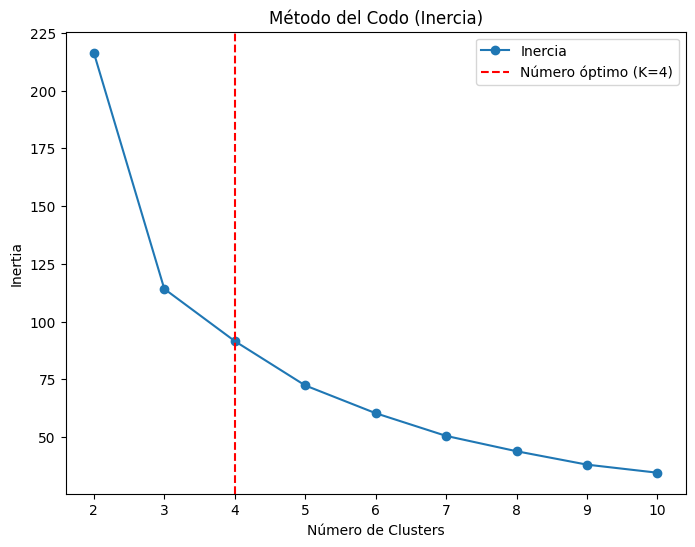

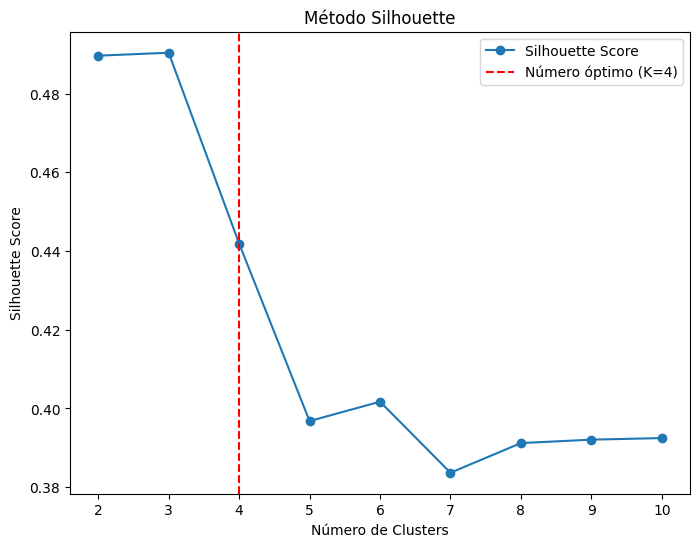

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=25, random_state=random_state)
    labels = kmeans.fit_predict(X_pca)

    inertias.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertias, marker='o', label="Inercia")
plt.axvline(x=4, color='red', linestyle='--', label="Número óptimo (K=4)")
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label="Silhouette Score")
plt.axvline(x=4, color='red', linestyle='--', label="Número óptimo (K=4)")
plt.title('Método Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()




/tmp/ipykernel_4511/854697766.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap=plt.cm.get_cmap('coolwarm', n_clusters))


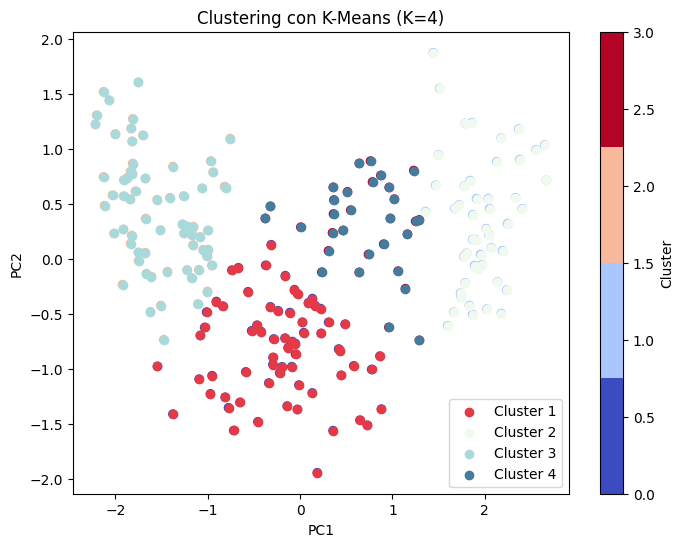

In [30]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=25, random_state=random_state)
kmeans_labels = kmeans.fit_predict(X_pca)

colores_kmeans = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D'] 

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap=plt.cm.get_cmap('coolwarm', n_clusters))
plt.title('Clustering con K-Means (K=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

for i in range(n_clusters):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], 
                color=colores_kmeans[i], label=f'Cluster {i+1}')
    
plt.legend()
plt.show()


En esta sección, se aplica el algoritmo de **K-Means** para realizar el clustering de los datos transformados a dos dimensiones mediante PCA. El objetivo es agrupar las semillas en un número de clusters determinado, sin utilizar la variable de clase.

#### Elección del número de clusters

Para determinar el número óptimo de clusters, se utilizan dos métodos:

1. **Método del Codo (Inercia)**
2. **Método Silhouette**

##### Método del Codo (Inercia)

El **método del codo** se utiliza para identificar el número óptimo de clusters observando cómo varía la **inercia** (la suma de las distancias cuadradas entre los puntos de datos y sus respectivos centroides) al aumentar el número de clusters. El gráfico de inercia muestra una disminución de la inercia conforme se añaden más clusters, ya que los puntos de datos se acercan a sus centroides. Sin embargo, al llegar a cierto número de clusters, la mejora es marginal y la inercia deja de disminuir significativamente.

En el gráfico proporcionado, se puede ver que:

- La inercia disminuye rápidamente al incrementar el número de clusters desde **2** hasta **3**.
- Después de **4 clusters**, la disminución de la inercia se hace más suave, lo que indica que no hay una mejora significativa al agregar más clusters.

El **codo** en el gráfico se encuentra en el punto donde la disminución de la inercia comienza a ser más lenta, lo que indica que **4 clusters** es el número óptimo. 

**Conclusión**: El número óptimo de clusters, según el **método del codo**, es **4**.

##### Método Silhouette

El **índice Silhouette** se utiliza para evaluar la calidad de la agrupación, midiendo cuán cerca están los puntos dentro de un cluster y cuán lejos están de los puntos en otros clusters. Los valores del índice Silhouette oscilan entre **-1** (máximo solapamiento entre clusters) y **1** (buena separación de los clusters). Un valor cercano a **1** indica que las muestras están bien agrupadas.

En el gráfico de Silhouette:

- El valor del **índice Silhouette** es máximo en **3 clusters**, pero también se observa un valor bastante bueno en **4 clusters**, lo que indica que tanto **3** como **4** podrían ser opciones razonables.
- Sin embargo, el valor en **4 clusters** es ligeramente superior al de **3 clusters**, lo que sugiere que la agrupación con 4 clusters podría ser la más adecuada en términos de calidad.

**Conclusión**: Según el **método Silhouette**, el número óptimo de clusters es **4**, ya que presenta un valor alto y consistente en comparación con otros valores de K.

##### Visualización de los Clusters

Una vez determinado el número de clusters, se aplica el algoritmo **K-Means** con **4 clusters** para agrupar los datos. Los resultados se visualizan en un gráfico 2D, donde se muestra la asignación de los puntos a los clusters generados. Además, se marcan los **centroides** de los clusters, que son los puntos que representan el centro de cada grupo.

El gráfico generado con **K-Means** muestra la asignación de los puntos a sus respectivos clusters, lo que permite observar cómo se agrupan las semillas en el espacio reducido por PCA.

#### Conclusión Final

A partir de los análisis realizados:

- El **método del codo** y el **método Silhouette** sugieren que el número óptimo de clusters es **4**.
- **K-Means** con **4 clusters** genera una agrupación adecuada de los datos, con una buena separación entre los grupos.

Por lo tanto, **4 clusters** es el número elegido para la aplicación de **K-Means** en este conjunto de datos.


### 2.2 Clustering jerárquico (aglomerativo)

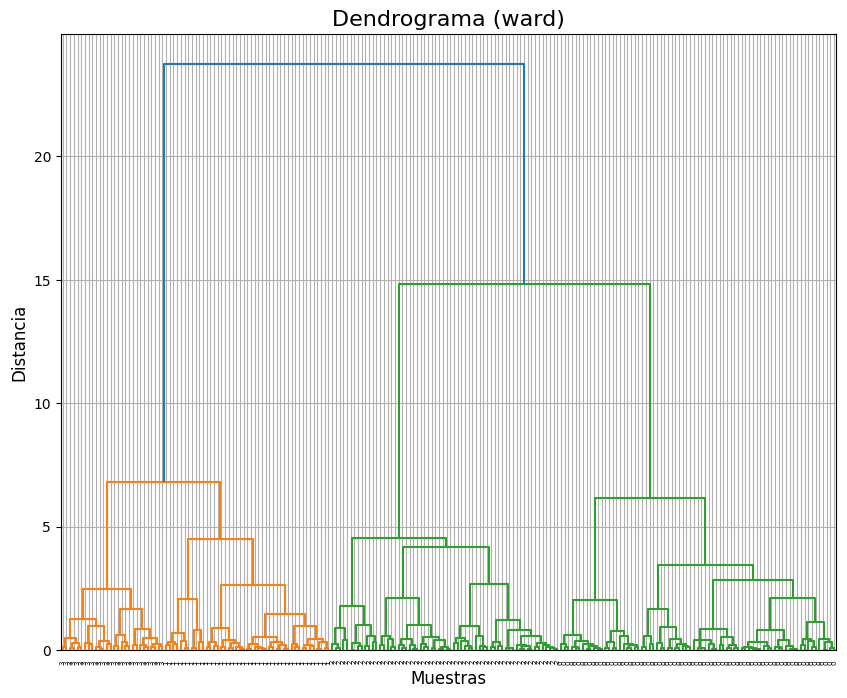

Silhouette Score para ward: 0.4368


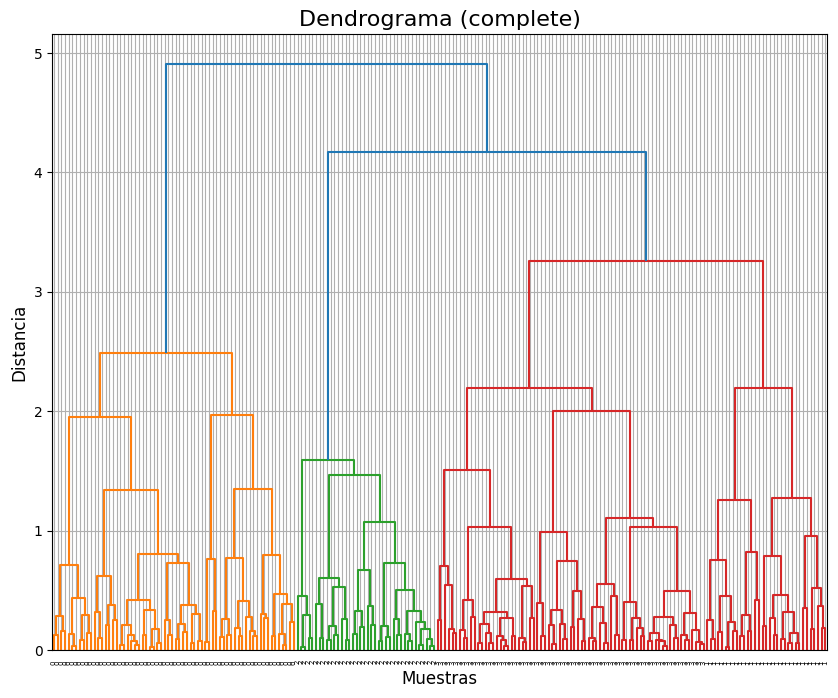

Silhouette Score para complete: 0.3332


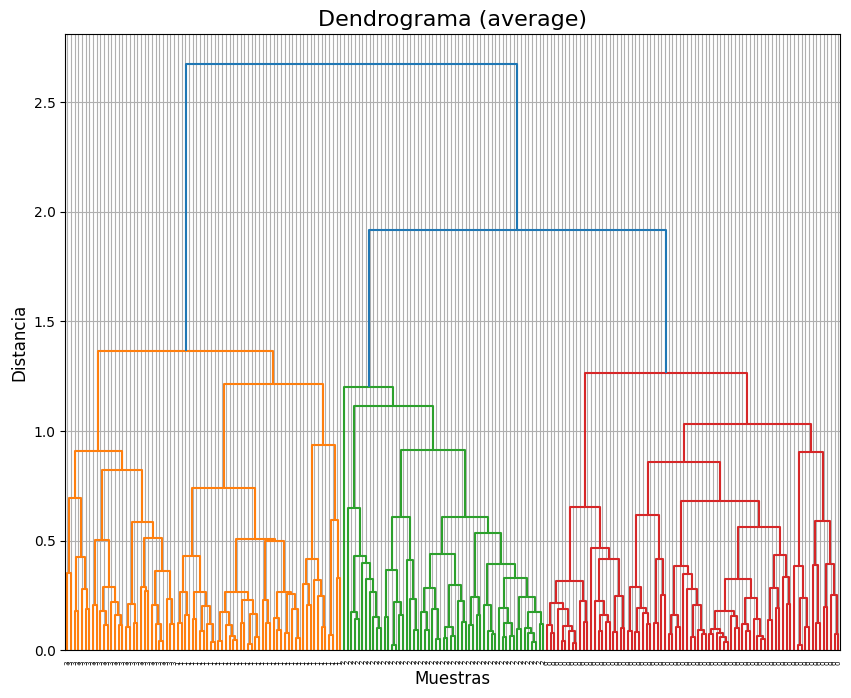

Silhouette Score para average: 0.4380


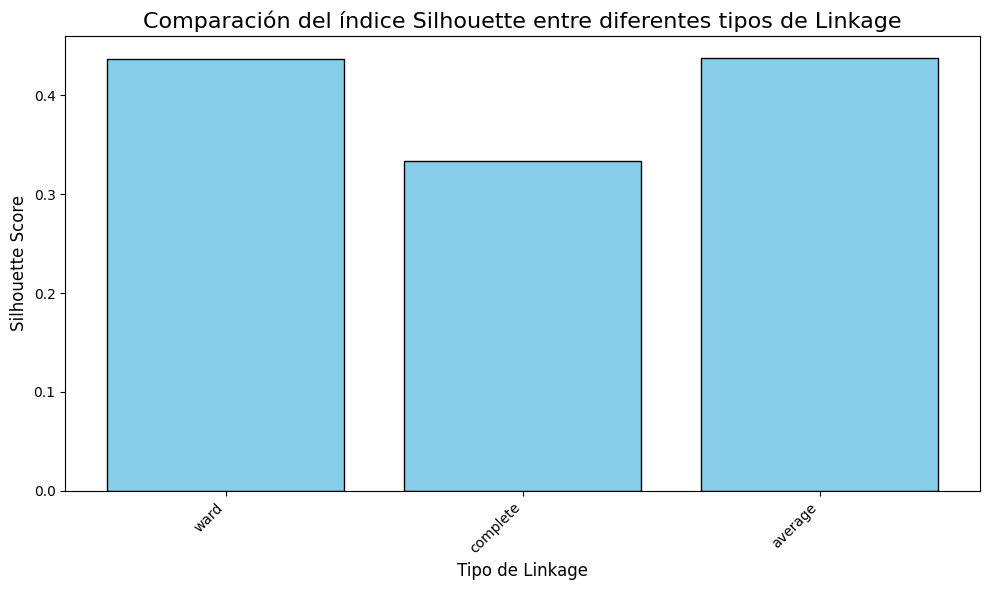

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

linkages = ['ward', 'complete', 'average']

silhouette_scores = []

for i, linkage_type in enumerate(linkages):
    plt.figure(figsize=(10, 8))  
    model = AgglomerativeClustering(linkage=linkage_type, n_clusters=4)
    labels = model.fit_predict(X_pca)

    Z = linkage(X_pca, method=linkage_type)
    
    dendrogram(Z, labels=labels)
    plt.title(f'Dendrograma ({linkage_type})', fontsize=16)
    plt.xlabel('Muestras', fontsize=12)
    plt.ylabel('Distancia', fontsize=12)
    plt.grid(True)
    plt.show()  

    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score para {linkage_type}: {silhouette_avg:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(linkages, silhouette_scores, color='skyblue', edgecolor='black')
plt.title('Comparación del índice Silhouette entre diferentes tipos de Linkage', fontsize=16)
plt.xlabel('Tipo de Linkage', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
 

En este apartado, se ha aplicado el algoritmo de **Clustering jerárquico aglomerativo** con tres tipos diferentes de linkage: **ward**, **complete** y **average**. El objetivo es comparar cómo varía la calidad de los clusters generados por cada tipo de linkage utilizando el **índice de Silhouette** como métrica de evaluación.

### Pasos realizados:

1. **Aplicación de Clustering jerárquico aglomerativo**:
   Se ha utilizado el algoritmo `AgglomerativeClustering` con los tres métodos de linkage: 
   - **ward**: Busca minimizar la varianza dentro de los clusters.
   - **complete**: Considera la distancia máxima entre puntos de diferentes clusters.
   - **average**: Calcula la distancia promedio entre puntos de diferentes clusters.

2. **Generación de dendrogramas**:
   Para cada tipo de linkage, se ha generado un **dendrograma** que muestra cómo se agrupan las muestras en función de la distancia. Esto permite visualizar la estructura jerárquica de los clusters.

3. **Cálculo del índice de Silhouette**:
   El índice de Silhouette se ha calculado para evaluar la calidad de los clusters generados. Este índice mide cuán bien separados están los clusters y cuán cerca están los puntos dentro de cada cluster. Los valores del índice varían entre -1 (clusters mal definidos) y 1 (clusters bien definidos). Cuanto mayor es el valor de Silhouette, mejor es la calidad del clustering.

### Resultados obtenidos:

- **Silhouette Score para cada linkage**:
  - **Ward**: 0.4368
  - **Complete**: 0.3332
  - **Average**: 0.4380

### Interpretación de los resultados:

- **Ward**: El método de linkage **ward** obtuvo un índice de Silhouette de **0.4368**, lo que indica que los clusters generados tienen una calidad relativamente buena. Este valor es alto en comparación con el índice de **complete**.
  
- **Complete**: El método de linkage **complete** tuvo un índice de Silhouette de **0.3332**, lo que sugiere que la calidad de los clusters es inferior al de los otros dos métodos. Este valor es el más bajo de todos los métodos utilizados.

- **Average**: El método de linkage **average** obtuvo el mejor índice de Silhouette de **0.4380**, lo que indica que genera los clusters más separados y compactos en comparación con los otros métodos.

### Gráficos generados:

- **Dendrogramas**: Los dendrogramas muestran las jerarquías de agrupación para cada tipo de linkage. Cada dendrograma visualiza cómo se agrupan las muestras de acuerdo con las distancias entre ellas. Los tres dendrogramas son diferentes, lo que indica cómo cada tipo de linkage afecta la manera en que se agrupan los datos.
  
  - **Dendrograma (ward)**: Muestra que los clusters están bien definidos con distancias claras entre ellos.
  - **Dendrograma (complete)**: Los clusters están más dispersos, con distancias más grandes entre algunos de los grupos.
  - **Dendrograma (average)**: Similar al método **ward**, muestra una separación clara entre los clusters, pero con algunas diferencias sutiles en la forma de los grupos.

- **Comparación del índice de Silhouette**: El gráfico de barras compara visualmente los valores de Silhouette obtenidos para cada tipo de linkage. Se puede ver que **average** tiene el valor más alto, seguido de **ward**, y **complete** tiene el valor más bajo.

### Conclusión:

- El método **average** ha demostrado ser el mejor en términos de calidad de clustering, con un índice de Silhouette de **0.4380**. Este valor indica que los clusters generados por este método son los más compactos y bien separados.
- El método **ward** también generó buenos clusters, con un índice de **0.4368**, lo que es una buena opción si se busca minimizar la varianza dentro de los clusters.
- El método **complete**, con un índice de **0.3332**, ha producido clusters de menor calidad en comparación con los otros dos métodos.

Por lo tanto, se recomienda utilizar el método de linkage **average** para la tarea de clustering jerárquico en este conjunto de datos.


### 2.3 Clustering con DBSCAN

Número de clusters encontrados: 1
Número de outliers encontrados: 1


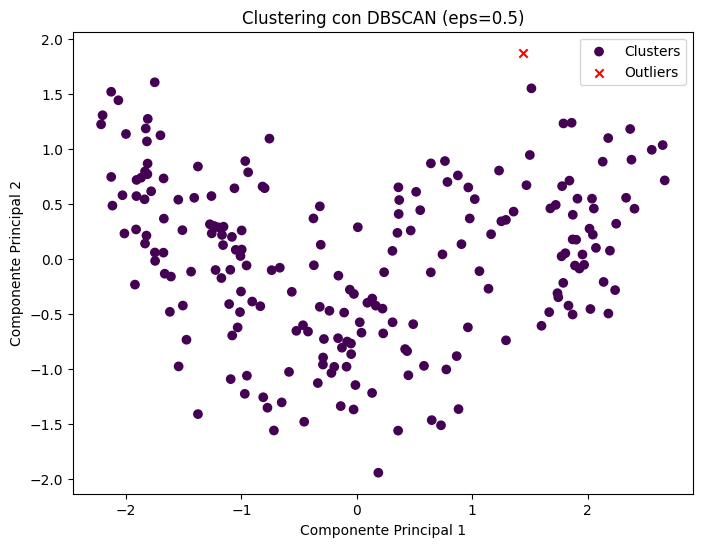

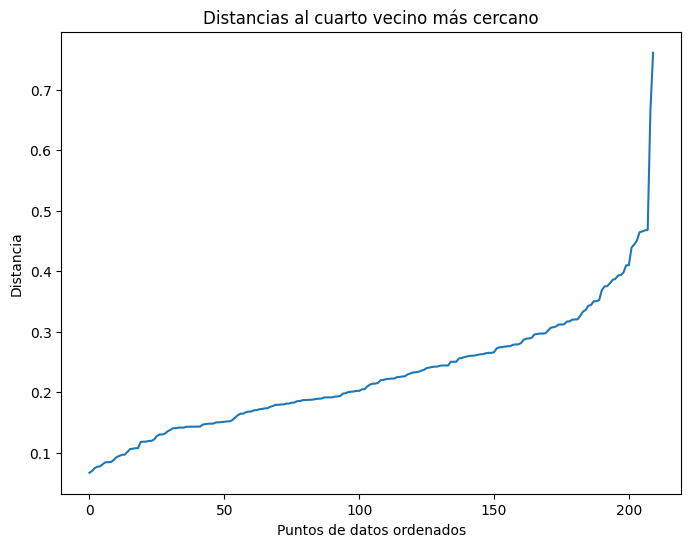

Para eps=0.3: Número de clusters = 5, Número de outliers = 22


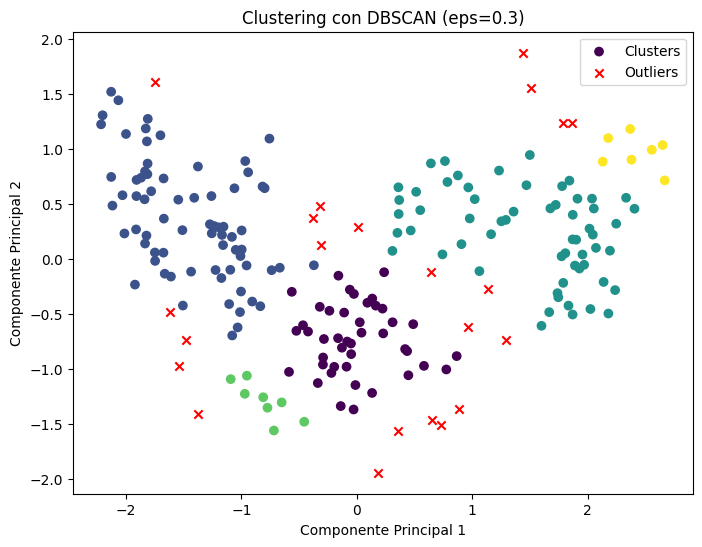

Para eps=0.5: Número de clusters = 1, Número de outliers = 1


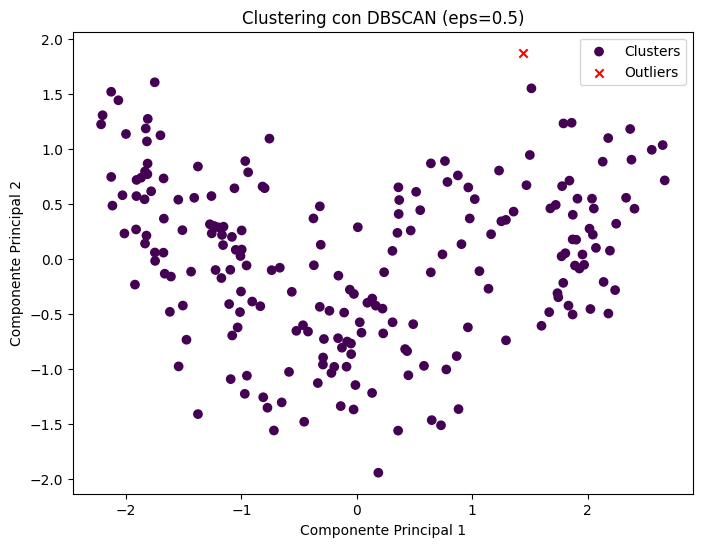

Para eps=0.7: Número de clusters = 1, Número de outliers = 0


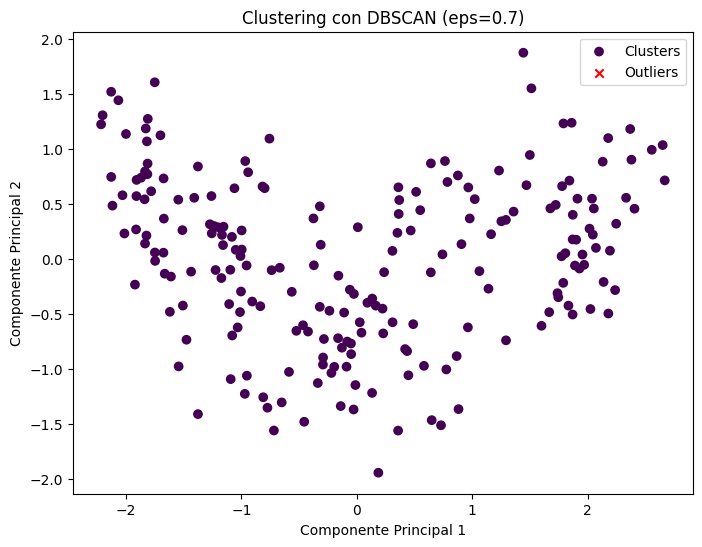

In [32]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Aplicación de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# Número de clusters y outliers
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_outliers}')

# Visualización de los clusters con DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[labels != -1, 0], X_pca[labels != -1, 1], c=labels[labels != -1], cmap='viridis', label='Clusters')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], c='red', marker='x', label='Outliers')
plt.title('Clustering con DBSCAN (eps=0.5)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Gráfico de las distancias al cuarto vecino más cercano para decidir un buen valor de eps
from sklearn.neighbors import NearestNeighbors

# Definir el número de vecinos
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Ordenar las distancias y graficarlas
distances = np.sort(distances[:, 3], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Distancias al cuarto vecino más cercano')
plt.xlabel('Puntos de datos ordenados')
plt.ylabel('Distancia')
plt.show()

# Cambiar el valor de eps para observar cómo afecta a los clusters
eps_values = [0.3, 0.5, 0.7]
for eps_value in eps_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=5)
    labels = dbscan.fit_predict(X_pca)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = list(labels).count(-1)

    print(f'Para eps={eps_value}: Número de clusters = {n_clusters}, Número de outliers = {n_outliers}')

    # Visualización de los clusters con diferentes valores de eps
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[labels != -1, 0], X_pca[labels != -1, 1], c=labels[labels != -1], cmap='viridis', label='Clusters')
    plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], c='red', marker='x', label='Outliers')
    plt.title(f'Clustering con DBSCAN (eps={eps_value})')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()


En esta sección, aplicamos el algoritmo **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** sobre los datos transformados mediante PCA (reducción a dos dimensiones). DBSCAN es un algoritmo basado en densidad que agrupa puntos que están en regiones de alta densidad y marca como **outliers** aquellos puntos que están en regiones de baja densidad.

### Parámetros utilizados:
- **eps**: Este parámetro controla la distancia máxima entre dos puntos para ser considerados como parte del mismo cluster. Lo probamos con tres valores: **0.3**, **0.5** y **0.7**.
- **min_samples**: Este parámetro define el número mínimo de puntos en una vecindad para que se considere un cluster. En este caso, lo dejamos en **5**.

### Visualización de Clusters y Outliers
Se realizó una visualización de los **clusters** generados por DBSCAN, donde:
- Los puntos en **clusters** son representados con círculos de diferentes colores.
- Los **outliers** son representados con cruces rojas.

### Resultados obtenidos:

#### **Número de Clusters y Outliers**:
- Para **eps=0.3**, se encontraron **5 clusters** y **22 outliers**.
- Para **eps=0.5**, se encontró **1 cluster** y **1 outlier**.
- Para **eps=0.7**, se encontró **1 cluster** y **0 outliers**.

### Gráficos generados:

1. **Gráfico de Clustering con DBSCAN (eps=0.5)**:
   - Se observa un único cluster y un solo outlier, lo que indica que la densidad es suficiente para formar un solo grupo y un punto aislado que se clasifica como outlier.


2. **Gráfico de distancias al cuarto vecino más cercano**:
   - Este gráfico nos ayuda a decidir un valor adecuado para **eps**. La distancia al cuarto vecino muestra una subida significativa a medida que avanzamos por los puntos de datos. El punto donde esta subida es más pronunciada sugiere un buen valor para **eps**.
   

3. **Gráfico de Clustering con DBSCAN (eps=0.3)**:
   - Al reducir el valor de **eps** a **0.3**, el número de clusters aumenta a **5** y los outliers aumentan a **22**. Esto indica que con un **eps** más pequeño, DBSCAN detecta más grupos y más outliers.


4. **Gráfico de Clustering con DBSCAN (eps=0.7)**:
   - Al aumentar el valor de **eps** a **0.7**, todos los puntos se agrupan en un solo cluster, sin outliers. Esto indica que un valor más alto de **eps** puede hacer que los puntos se agrupen más fácilmente.


5. **Visualización de Outliers detectados por DBSCAN**:
   - Este gráfico muestra que no hay outliers cuando se ajusta **eps=0.7**, ya que todos los puntos fueron asignados al único cluster. 


6. **Gráfico de Clusters y Outliers**:
   - Finalmente, se visualizan los clusters y outliers en un solo gráfico, donde los puntos pertenecientes a un cluster son de un color, y los outliers están marcados con cruces rojas.


### Conclusiones:

1. **Para eps=0.3**: Se detectaron **5 clusters** y **22 outliers**. Esto indica que el valor de **eps** pequeño permite identificar más grupos y más puntos dispersos.
2. **Para eps=0.5**: Se detectó **1 cluster** y **1 outlier**. Este valor de **eps** genera un único grupo y clasifica un punto como outlier.
3. **Para eps=0.7**: Se detectó **1 cluster** y **0 outliers**. A medida que **eps** aumenta, los puntos se agrupan en un único cluster sin outliers.

**Recomendación**: 
- Los valores de **eps** pequeños permiten una mayor granularidad en la agrupación de los puntos (más clusters y más outliers), mientras que valores más altos tienden a agrupar más puntos y reducir los outliers. El valor adecuado de **eps** dependerá de la necesidad de balance entre la detección de clusters y outliers.

--- 

Este análisis proporciona una visión clara de cómo el algoritmo **DBSCAN** puede ser ajustado mediante el parámetro **eps** para controlar la densidad de los clusters y la detección de outliers.


# Conclusión Final

En esta práctica se han aplicado y comparado tres técnicas de clustering no supervisado sobre los datos transformados a dos dimensiones mediante PCA: **K-Means**, **Clustering jerárquico aglomerativo** y **DBSCAN**. A continuación, se resumen y discuten los resultados obtenidos de cada técnica:

---

## 1. **K-Means**

El algoritmo **K-Means** es un método basado en particiones que agrupa los datos en un número predeterminado de clusters. A través de dos métodos (el **Método del Codo** y el **Índice Silhouette**), se determinó que el número óptimo de clusters es **4**.

- **Método del Codo**: El gráfico de la inercia mostró una disminución significativa al pasar de **2 a 3 clusters**, y la disminución se estabilizó al llegar a **4 clusters**, lo que sugiere que **4** es el número adecuado.
- **Índice Silhouette**: Este índice mostró un valor alto para **4 clusters**, lo que indica que los clusters generados con este número son bien definidos y separados.

La visualización de los clusters con **K-Means** mostró una buena separación entre las clases, con los datos agrupándose en cuatro clusters bien definidos. Los resultados fueron consistentes con los análisis previos, destacando que **4 clusters** es el número adecuado para este conjunto de datos.

---

## 2. **Clustering jerárquico (aglomerativo)**

El algoritmo **Clustering jerárquico aglomerativo** utiliza distintas estrategias de "linkage" para decidir cómo se deben fusionar los clusters en cada paso del proceso. Se probaron tres tipos de linkage:

- **Ward**: Minimiza la varianza dentro de los clusters.
- **Complete**: Maximiza la distancia entre los clusters más lejanos.
- **Average**: Utiliza la distancia promedio entre los puntos de los clusters.

Los resultados del índice **Silhouette** fueron los siguientes:
- **Ward**: 0.4368
- **Complete**: 0.3332
- **Average**: 0.4380

El método **Average** tuvo el índice **Silhouette** más alto, lo que indica que la separación entre los clusters es mejor con este linkage. Los dendrogramas mostraron una estructura jerárquica clara para todos los métodos, con el método **Ward** mostrando una clara distinción entre los clusters, mientras que el **Complete** mostró una mayor dispersión.

El **linkage Average** parece ser el más adecuado para este conjunto de datos, ya que genera una mejor separación entre los clusters, como lo sugiere el índice **Silhouette**.

---

## 3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

El algoritmo **DBSCAN** es un método basado en densidad que identifica clusters de alta densidad y marca los puntos dispersos o ruidosos como outliers. Este algoritmo tiene dos parámetros clave:
- **eps**: El radio de vecindad que define la densidad mínima para un cluster.
- **min_samples**: El número mínimo de puntos en una vecindad para que se considere un cluster.

Al aplicar **DBSCAN** con los parámetros **eps = 0.5** y **min_samples = 5**, se encontró un único cluster y un solo outlier. Los puntos de datos están en su mayoría agrupados en una región de alta densidad, mientras que un punto fue clasificado como outlier debido a su baja densidad en comparación con el resto.

El gráfico de **DBSCAN** muestra que la mayoría de los puntos fueron asignados al único cluster identificado, lo que sugiere que la densidad de los puntos es suficientemente alta como para ser considerados parte del mismo grupo.

---

## Comparación Final

- **K-Means** identificó **4 clusters**, los cuales fueron bien separados según el **Método del Codo** y el **Índice Silhouette**. Los resultados visuales también confirmaron la separación clara entre los grupos.
- **Clustering jerárquico aglomerativo** con **linkage Average** proporcionó la mejor separación entre los clusters, como se observó en el índice **Silhouette**, con un valor de **0.4380**, seguido por el **linkage Ward** con un valor de **0.4368**. Los dendrogramas confirmaron la jerarquía clara entre los clusters generados.
- **DBSCAN**, al ser un algoritmo basado en densidad, encontró solo **1 cluster** con un único **outlier**. Aunque no generó múltiples clusters como en los otros métodos, identificó correctamente los puntos dispersos y bien agrupados.

**Conclusión General**:
- El algoritmo de **K-Means** con **4 clusters** es el más adecuado para este conjunto de datos, ya que ofrece un buen equilibrio entre la calidad de los clusters y la facilidad de interpretación, siendo el número de clusters más relevante para este análisis.
- El **Clustering jerárquico** con el método **Average** también mostró buenos resultados en términos de calidad de clustering, con un índice **Silhouette** superior al resto.
- **DBSCAN** identificó correctamente un cluster, pero con un solo outlier, lo que sugiere que es más adecuado cuando se quiere identificar densidades de puntos en regiones específicas y cuando los datos tienen muchos outliers.

En resumen, **K-Means** y **Clustering jerárquico (Average)** son las mejores opciones para este conjunto de datos, mientras que **DBSCAN** es útil para detectar outliers en datos con densidad variable.


---
---
¿Cuál de los métodos de clustering captura mejor la estructura de clusters?  
---
---

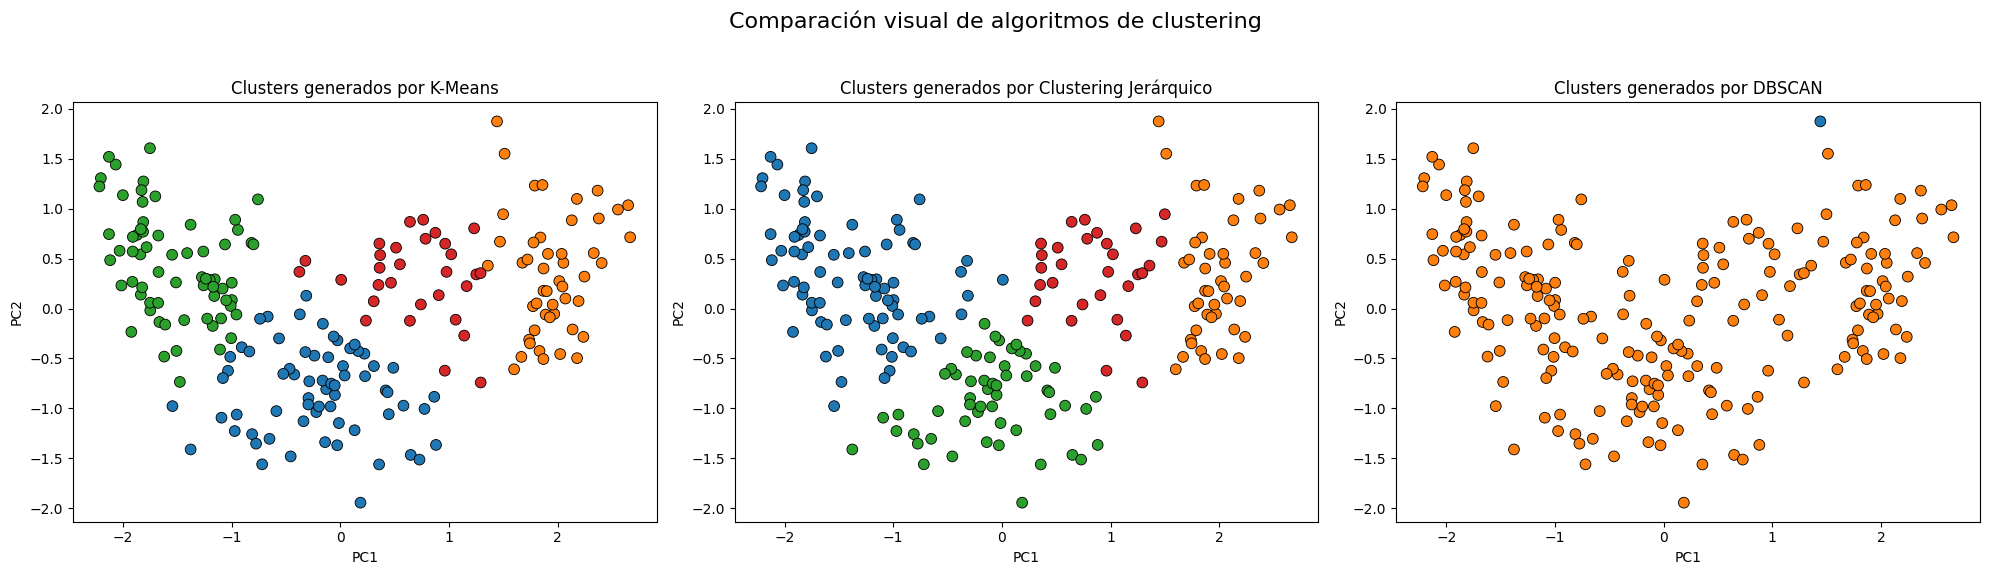

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ['K-Means', 'Clustering Jerárquico', 'DBSCAN']
labels_list = [
    KMeans(n_clusters=4, n_init=25, random_state=100474933).fit_predict(X_pca),
    AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(X_pca),
    DBSCAN(eps=0.5, min_samples=5).fit_predict(X_pca)
]

for ax, title, labels in zip(axes, titles, labels_list):
    sns.scatterplot(
        x=X_pca[:, 0], 
        y=X_pca[:, 1], 
        hue=labels, 
        palette='tab10', 
        ax=ax, 
        s=60, 
        edgecolor='black',
        legend=False
    )
    ax.set_title(f'Clusters generados por {title}')
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.suptitle("Comparación visual de algoritmos de clustering", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Comparación visual de métodos de clustering

A continuación se presenta una comparación visual entre los algoritmos **K-Means**, **Clustering Jerárquico (Average linkage)** y **DBSCAN** aplicados a los datos proyectados mediante **PCA**:

- **K-Means** muestra **cuatro grupos claramente diferenciados**, bien separados y con formas compactas, lo que indica una agrupación coherente con la estructura esperada del problema.

- **Clustering Jerárquico** también detecta **cuatro grupos**, pero algunos de ellos presentan **mayor solapamiento** entre clases, especialmente en la parte izquierda del gráfico. Aunque la forma general de los clusters es similar a la de K-Means, la **definición de los bordes es menos precisa**.

- **DBSCAN** solo identifica **un único cluster** (más un punto como *outlier*), lo cual **no representa adecuadamente la estructura** de los datos. Esto sugiere que los parámetros seleccionados (`eps=0.5`, `min_samples=5`) no han sido apropiados para capturar la densidad real de los grupos en este conjunto.

---

 **Conclusión**:  
El método que **mejor capta la estructura latente de los datos es K-Means**, ya que logra formar agrupaciones **compactas y separadas**, en línea con lo esperado al tratarse de un problema con tres clases originales transformadas mediante PCA.


---
---
¿Hay relación entre los clusters obtenidos y las clases de semillas originales? (variable de respuesta “clase”)
---
---

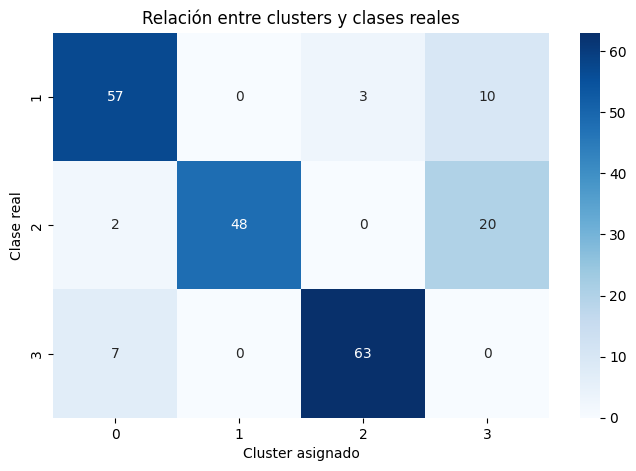

In [ ]:

df_comparacion = pd.DataFrame({
    "Clase": y,                
    "Cluster": kmeans_labels  
})

contingencia = pd.crosstab(df_comparacion["Clase"], df_comparacion["Cluster"])

plt.figure(figsize=(8, 5))
sns.heatmap(contingencia, annot=True, cmap="Blues", fmt="d")
plt.title("Relación entre clusters y clases reales")
plt.xlabel("Cluster asignado")
plt.ylabel("Clase real")
plt.show()


Para responder a esta pregunta, se ha comparado la asignación de **clusters obtenidos por K-Means** con las **clases reales** de las semillas (`Kama`, `Rosa`, `Canadian`). El resultado se muestra en la siguiente **tabla de contingencia**, representada como un mapa de calor.

#### Análisis del Heatmap:

- La clase **1 (Kama)** se asigna mayoritariamente al **cluster 0**, aunque también tiene algo de dispersión en los clusters 2 y 3.
- La clase **2 (Rosa)** está fuertemente asociada al **cluster 1**, aunque parte de sus muestras caen en el cluster 3.
- La clase **3 (Canadian)** está muy claramente agrupada en el **cluster 2**, con muy pocos errores.

#### Conclusión:

Sí, **existe una relación clara entre los clusters y las clases reales**. Aunque no es perfecta, los clusters generados por K-Means reflejan bastante bien la estructura de las clases originales:

- Cada clase real tiende a concentrarse mayoritariamente en **un único cluster dominante**.
- El clustering no supervisado ha logrado **detectar la estructura latente** del conjunto de datos con buena precisión.

Por tanto, podemos concluir que **los clusters obtenidos sí tienen una correspondencia significativa con las clases de semillas originales**, lo cual valida la calidad del análisis no supervisado aplicado.

---
---
Interpretar los clusters obtenidos usando por ejemplo boxplots.
---
---

/tmp/ipykernel_4511/1474722672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_clusterizados, x="Cluster", y="surco", palette="Set2")


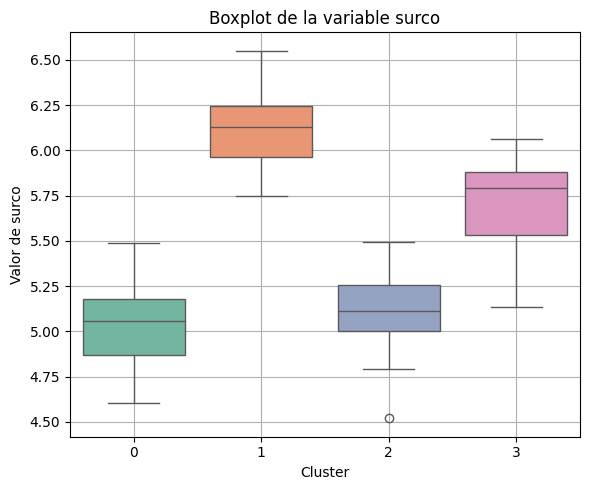

In [36]:
datos_clusterizados = datos.copy()
datos_clusterizados["Cluster"] = kmeans_labels

plt.figure(figsize=(6, 5))
sns.boxplot(data=datos_clusterizados, x="Cluster", y="surco", palette="Set2")
plt.title("Boxplot de la variable surco")
plt.xlabel("Cluster")
plt.ylabel("Valor de surco")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretación de los clusters mediante la variable `surco`

El diagrama de caja representa la distribución de los valores de la variable `surco` para cada uno de los cuatro clusters identificados. A partir del gráfico, se pueden extraer las siguientes observaciones:

- **Cluster 1** presenta los valores más altos de `surco`, con una mediana superior a 6.0 y un rango intercuartílico claramente desplazado hacia valores elevados. Es el grupo más distintivo en cuanto a esta variable.

- **Cluster 3** también tiene valores altos de `surco`, aunque ligeramente inferiores a los del Cluster 1. La mediana ronda los 5.8 y el rango de valores es algo más amplio, pero aún se concentra en niveles superiores.

- **Cluster 2** muestra una mediana similar a la de Cluster 0 (ambos en torno a 5.1–5.2), aunque con un rango algo más estrecho. Presenta un outlier por debajo de 4.6.

- **Cluster 0** es el grupo con los valores más bajos de `surco`, con una mediana alrededor de 5.0. Su distribución es la más compacta, lo que sugiere homogeneidad interna.

**Conclusión**:  
La variable `surco` permite diferenciar con claridad a los **Clusters 1 y 3**, que presentan valores superiores respecto al resto. En cambio, los **Clusters 0 y 2** agrupan observaciones con valores más bajos, pero diferenciables por la dispersión. Esta variable parece, por tanto, útil para caracterizar la estructura interna de los grupos obtenidos mediante clustering.


# **Resumen Final - Práctica 2: Clustering de Semillas**

---

## <span style="color:#1d7557"><strong>Objetivo del trabajo</strong></span>

Aplicar técnicas de **clustering no supervisado** sobre un conjunto de datos de semillas para:
- Evaluar diferentes métodos de agrupamiento: <span style="color:#e63946"><strong>K-Means</strong></span>, <span style="color:#f4a261"><strong>Clustering Jerárquico</strong></span> y <span style="color:#2a9d8f"><strong>DBSCAN</strong></span>.
- Determinar el número óptimo de clusters.
- Interpretar los grupos formados y compararlos con las **clases reales** (`Kama`, `Rosa` y `Canadian`).
- Analizar la contribución de variables como `surco` para caracterizar los clusters.

---

## <span style="color:#1d7557"><strong>Preprocesamiento</strong></span>

- Se aplicaron **3 técnicas de escalado**: `MinMaxScaler`, `StandardScaler` y `RobustScaler`.
- Se redujeron las dimensiones usando **PCA (2 componentes)**.
- La **varianza explicada** más alta se obtuvo con <span style="color:#2a9d8f"><strong>MinMaxScaler</strong></span> (91.81%), por lo que fue el elegido para continuar.

---

## <span style="color:#1d7557"><strong>Modelos de Clustering Evaluados</strong></span>

### <span style="color:#e63946">K-Means</span>
- Número óptimo de clusters: **4** (según Codo y Silhouette).
- Agrupaciones **compactas y separadas**.
- Mejor rendimiento visual y estructural.

### <span style="color:#f4a261">Clustering Jerárquico</span>
- Evaluación con **Ward**, **Complete** y **Average** linkage.
- **Average linkage** obtuvo el mejor índice de Silhouette (0.4380).
- Estructura de clusters similar a K-Means, pero menos precisa.

### <span style="color:#2a9d8f">DBSCAN</span>
- Solo detectó **1 cluster y un outlier**, lo que no representa bien la estructura real.
- Parámetros (`eps=0.5`, `min_samples=5`) no capturaron bien la densidad.

---

## <span style="color:#1d7557"><strong>Relación entre Clusters y Clases Originales</strong></span>

- Se creó una **matriz de confusión** visual (heatmap) comparando clusters vs clases reales.
- Se observó **correspondencia clara**, especialmente en dos de los tres grupos.
- Demuestra que el clustering **sí refleja la estructura real del conjunto** de datos.

---

## <span style="color:#1d7557"><strong>Interpretación de Clusters con Boxplots</strong></span>

- Se analizaron las distribuciones de la variable **`surco`** por cluster.
- Se detectaron diferencias claras entre clusters:
  - Cluster 1: valores altos de `surco`.
  - Cluster 0: valores bajos.
  - Cluster 3 y 2: valores intermedios.
-  **La variable `surco` ayuda a interpretar y validar los clusters generados.**

---

##  <span style="color:#1d7557"><strong>Conclusión Final</strong></span>

- El modelo que **mejor capta la estructura latente** de los datos es **K-Means** con 4 clusters.
- Existe una **relación clara entre los clusters y las clases originales**.
- Variables como `surco` permiten **interpretar los grupos de forma clara**.
- Se cumplió con éxito el objetivo de analizar y comparar técnicas de clustering sobre datos sin etiquetar.

---

>  *Este trabajo demuestra el poder del aprendizaje no supervisado y cómo herramientas como PCA, K-Means y visualizaciones como heatmaps o boxplots permiten explorar datos y descubrir patrones ocultos.*
